We demonstrate that our code can find the smallest ellipsoid that covers some given points.

In [1]:
import jupyter_black

jupyter_black.load()
import numpy as np
import matplotlib.pyplot as plt
import minimal_outer_ellipsoid.ellipsoid as ellipsoid
import pydrake.solvers as solvers
import pydrake.symbolic as sym

First we set some points in 2D

In [2]:
pts = np.array([[2, 1], [2, -1], [-2, 1], [-2, -1], [0, 1.5]])

Now we search the minimal-volume outer ellipsoid through a convex optimization problem.

In [3]:
prog = solvers.MathematicalProgram()
S = prog.NewSymmetricContinuousVariables(2, "S")
b = prog.NewContinuousVariables(2, "b")
c = prog.NewContinuousVariables(1, "c")[0]

ellipsoid.add_pts_in_ellipsoid_constraint(prog, pts, S, b, c)
ellipsoid.add_minimize_volume_cost(prog, S, b, c)
result = solvers.Solve(prog)
assert result.is_success()
S_sol = result.GetSolution(S)
b_sol = result.GetSolution(b)
c_sol = result.GetSolution(c)

ValueError: s must be a scalar, or float array-like with the same size as x and y

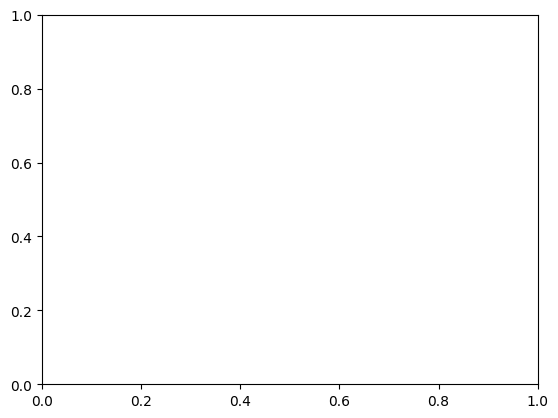

In [5]:
# Now we plot the optimized ellipsoid
A, d = ellipsoid.to_affine_ball(S_sol, b_sol, c_sol)

theta = np.linspace(0, 2 * np.pi, 100)
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(pts[:, 0], pts[:, 1], c="r")
ellipsoid_contour = A @ (
    np.concatenate(
        [np.cos(theta).reshape(1, -1), np.sin(theta).reshape(1, -1)], axis=0
    )
    + d.reshape((2, 1))
)
ax.plot(ellipsoid_contour[0], ellipsoid_contour[1])
ax.axis("equal")
fig.show()